## **Part 1**

In [3]:
# we import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
import warnings
warnings.filterwarnings("ignore")

Lets import our FICO dataset.

In [67]:
fdf = pd.read_csv("fico.csv")
fdf

,acct_id,FICO
0,1,768
1,2,850
2,3,677
3,4,843
4,5,796
...,...,...
100008,99996,NaN
100009,99997,NaN
100010,99998,NaN
100011,99999,SSS


In [68]:
fdf.isna().sum() # we check null values

acct_id        0
FICO       29615
dtype: int64

We see that we have some missing data so we will deal with them later.

In [69]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100013 entries, 0 to 100012
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   acct_id  100013 non-null  int64 
 1   FICO     70398 non-null   object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


We see that FICO column dtype is object so there might be some discrepency. But we will look into that later.

In [70]:
len(fdf)

100013

In [71]:
fdf["acct_id"].nunique()

100000

We see that there are only 100000 unique account IDs but we have a total of 100013 observations. This signifies that there must be 13 duplications. So lets get them and analyze.

In [72]:
fdf[fdf["acct_id"].duplicated(False)]

,acct_id,FICO
139,140,752
140,140,752
189,189,745
190,189,745
191,190,828
192,190,828
193,191,752
194,191,752
195,192,850
196,192,850


We don't see much complication with the duplicated data visually but to confirm that each duplicate **account ID** has the exact same FICO score, we will run the same method on on both the features and check the length.

In [73]:
len(fdf[fdf[["acct_id", "FICO"]].duplicated()])

13

Since, its still the 13 duplicates, it confirms we have exact same duplicated rows so we will drop them.

In [74]:
fdf.drop_duplicates(inplace=True)

In [75]:
len(fdf), fdf["acct_id"].nunique() # we confirm the length again after dropping just to be sure

(100000, 100000)

Now, lets proceed to analyze the data. First we will investigate why our **FICO** feature is object type.

In [76]:
fdf.dropna()[~fdf.dropna()["FICO"].str.isnumeric()]

,acct_id,FICO
133,134,AA
100011,99999,SSS


So, we find that there are two errors in our **FICO** column. We will go ahead and drop them.

In [77]:
err_mask = fdf.dropna()[~fdf.dropna()["FICO"].str.isnumeric()].index
fdf.drop(err_mask, axis=0, inplace=True) # dropped the error observations

We will create a new column to mark if there is missing FICO scores as per the project instructions.

In [78]:
fdf["Missing"] = fdf["FICO"].apply(lambda x: 1 if np.isnan(float(x)) == True else 0)

In [79]:
fdf[fdf["Missing"] == 1] # we see that all the null values got marked

,acct_id,FICO,Missing
10,11,NaN,1
17,18,NaN,1
40,41,NaN,1
42,43,NaN,1
43,44,NaN,1
...,...,...,...
100007,99995,NaN,1
100008,99996,NaN,1
100009,99997,NaN,1
100010,99998,NaN,1


Now, lets group the FICO scores for further analysis. For the ranges, we will be using this Forbes website for reference ([Website Link](https://www.forbes.com/advisor/credit-score/what-is-a-fico-score/)).

* Poor (less than 580). A score under 580 is well below average and classified as Poor under the FICO scoring model. Consumers with scores in this range are considered risky borrowers.
* Fair (580 to 669). Still below average, scores between 580 and 669 are considered Fair on the FICO scale. Borrowers with a FICO Score in this range may be approved by many lenders—though they likely won’t be offered favorable terms.
* Good (670 to 739). FICO scores in the Good range are at or above the national average. Because of this, most lenders are willing to extend funds to borrowers in this category.
* Very Good (740 to 799). A Very Good FICO Score is in the range of 740 to 799. Because this level of score is above average, it indicates to lenders that the consumer is low risk and likely to pay off their loan on time.
* Exceptional (800 to 850). Consumers with a FICO Score of 800 or above are considered Exceptional. Not only are these borrowers most likely to get approved, but they also have access to the most competitive rates and other loan terms.

In [80]:
# we will define a function to categorise our FICO scores
def categ_fico(x):
    if x < 580:
        return "Poor"
    elif (x > 580) & (x <= 669):
        return "Fair"
    elif (x > 669) & (x <= 739):
        return "Good"
    elif (x > 739) & (x <= 799):
        return "Very Good"
    else:
        return "Exceptional"

In [81]:
fico_categories = fdf["FICO"].dropna().astype("int").apply(categ_fico) # we categorise all the fico scores and save into a variable

In [82]:
# we explore the percentage of total for our fico categories
(fico_categories.value_counts(normalize=True)*100).round(2)

Exceptional    52.48
Very Good      26.04
Good           15.60
Fair            4.81
Poor            1.07
Name: FICO, dtype: float64

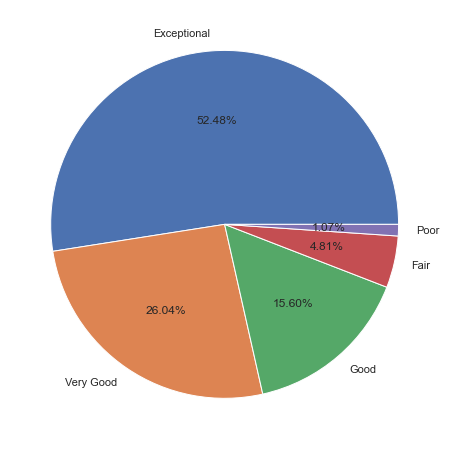

In [83]:
# we plot a pie plot
plt.pie(fico_categories.value_counts(), labels=fico_categories.value_counts().index, autopct="%.2f%%")
plt.show()

In [84]:
# we check the actual value counts
fico_categories.value_counts()

Exceptional    36938
Very Good      18328
Good           10979
Fair            3388
Poor             753
Name: FICO, dtype: int64

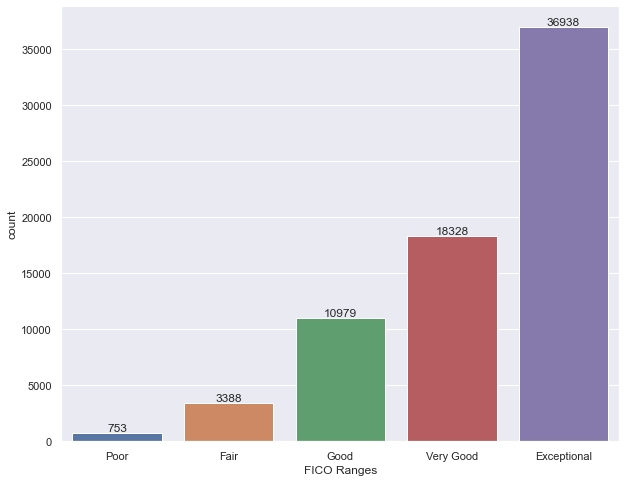

In [85]:
ax = sns.countplot(x=fico_categories.values, order=fico_categories.value_counts().sort_values().index)
abs_values = fico_categories.value_counts().sort_values().values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.xlabel("FICO Ranges")
plt.show()

We can see that majority of people fall in Exceptional ranges.

Now, lets plot the FICO scores on a histogram and analyze.

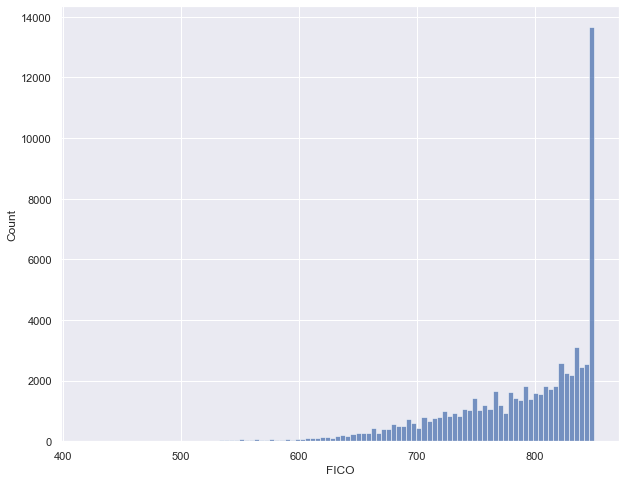

In [86]:
sns.histplot(fdf["FICO"].astype("float"), bins=100);

Again, we see the same pattern. We have a left / negatively skewed distribution. Let's check the skewness too.

In [87]:
print("Skewness:",fdf["FICO"].astype("float").skew().round(2))

Skewness: -1.25


#### **From this we can probably conclude that majority of the people have high credit scores. Are they being given such high scores or they have acquired it? It looks like it is given so that they can have more credit to spend compared to what they earn which will probably keep them forever in the debt cycle.**

Now we will import our Region dataset.

In [88]:
rdf = pd.read_csv("region.csv")
rdf

,acct_id,region
0,1,New York
1,2,Dallas
2,3,Los Angeles
3,4,Chicago
4,5,Philadelphia
...,...,...
100168,99996,Chicago
100169,99997,New York
100170,99998,San Diego
100171,99999,Chicago


In [89]:
rdf.isna().sum() # we check for null values

acct_id    0
region     0
dtype: int64

Lets again check for duplicate account ids.

In [90]:
rdf[rdf["acct_id"].duplicated()]

,acct_id,region
27,27,Los Angeles
28,27,Dallas
2577,2575,Dallas
2578,2575,Los Angeles
5015,5011,Dallas
...,...,...
97547,97379,Los Angeles
97813,97644,Los Angeles
97831,97661,Los Angeles
98464,98293,Los Angeles


We again see there are duplicate account ids. Lets see if all the region data are also exact same duplicates so that we can drop those rows altogether.

In [91]:
len(rdf[rdf["acct_id"].duplicated()]) # len of duplicate account ids

173

In [92]:
len(rdf[rdf[["acct_id", "region"]].duplicated()]) # len of duplicate account ids and region

49

So, voila!!! It gets interesting!! We see that there are unique regions for the same account ids. Lets explore this further.

In [93]:
# first we will drop the exact duplicates as that data is redundant
rdf.drop_duplicates(inplace=True)

We explore the unique regions for the same account ids.

In [94]:
rdf[rdf["acct_id"].duplicated(keep = False)]["region"].value_counts()

Los Angeles    124
Dallas         124
Name: region, dtype: int64

In [95]:
rdf.groupby(rdf[rdf["acct_id"].duplicated(keep = False)]["acct_id"])["region"].count()

acct_id
27.0       2
2575.0     2
5011.0     2
5737.0     2
6291.0     2
          ..
97379.0    2
97644.0    2
97661.0    2
98293.0    2
99388.0    2
Name: region, Length: 124, dtype: int64

In [96]:
len(rdf.groupby(rdf[rdf["acct_id"].duplicated(keep = False)]["acct_id"])["region"].count())

124

As we can see here, all the duplicate account ids has exactly the same two unique locations which are Los Angeles and Dallas.

##### **NOTE: *Here, at this stage we can go ahead and ask our senior what he/she thinks about why this happened in our data and if he/she wants us to keep one or the other region.***

For now, we will go ahead and drop these rows from our dataset because the observations are very minuscule compared to the size of our dataset.

In [97]:
rdf.drop_duplicates(["acct_id"], keep=False, inplace=True) # dropped

Now, lets join both our FICO and Region datasets. We will be doing outer join because we dropped rows from both our datasets and we don't want to lose unmatched information from either side here.

In [98]:
df = pd.merge(left=fdf, left_on = fdf["acct_id"], how = "outer", right = rdf, right_on = rdf["acct_id"]) # concatenated df

In [99]:
df.head()

,key_0,acct_id_x,FICO,Missing,acct_id_y,region
0,1,1.0,768,0.0,1.0,New York
1,2,2.0,850,0.0,2.0,Dallas
2,3,3.0,677,0.0,3.0,Los Angeles
3,4,4.0,843,0.0,4.0,Chicago
4,5,5.0,796,0.0,5.0,Philadelphia


In [101]:
df.drop(columns=["acct_id_x", "acct_id_y"], inplace=True)

In [102]:
df.rename({"key_0":"acct_id"}, axis=1, inplace=True) # renamed back our account id

In [103]:
df.head()

,acct_id,FICO,Missing,region
0,1,768,0.0,New York
1,2,850,0.0,Dallas
2,3,677,0.0,Los Angeles
3,4,843,0.0,Chicago
4,5,796,0.0,Philadelphia


Now, we see that we have our joined dataframe as per project instructions. Now we will go ahead and drop all the observations with null values and find the regions which have the second highest and lowest average FICO score as per the project objective.

In [104]:
df.dropna(inplace=True)

In [105]:
# we check the number of unique regions
df["region"].nunique()

10

In [106]:
# we also check the value counts for each region
df["region"].value_counts()

San Antonio     7189
Dallas          7149
Charlotte       7091
New York        7071
Houston         7065
Phoenix         7014
Philadelphia    6951
San Diego       6946
Chicago         6928
Los Angeles     6858
Name: region, dtype: int64

In [107]:
df["FICO"] = df["FICO"].astype("int") # converted FICO scores to integer

In [108]:
# we plot all the regions with their average FICO scores from highest to lowest
df.groupby("region")["FICO"].mean().sort_values(ascending=False).round(2)

region
Los Angeles     791.25
Phoenix         788.17
Houston         786.01
Dallas          785.88
Philadelphia    785.77
Chicago         785.64
Charlotte       785.15
New York        785.07
San Antonio     784.51
San Diego       784.08
Name: FICO, dtype: float64

In [109]:
# we create a dataframe of the above info
fico_series = df.groupby("region")["FICO"].mean().sort_values(ascending=False).round(2) 
top_fico_df = pd.DataFrame({"region":fico_series.index, "average_FICO":fico_series.values})

In [110]:
top_fico_df.iloc[[1,9]]

,region,average_FICO
1,Phoenix,788.17
9,San Diego,784.08


#### We see that the region that has the second highest FICO score is **"Phoenix"** and the region that has the lowest FICO score is **"San Diego"**.

#### **~~~~~~~~~~~ END OF PART 1 ~~~~~~~~~~~**

## **Part 2**

**I.** We will try to put some common knowledge to answer this question.

Lets consider a few points which can be found with a simple google search:
* Around ~ 3 million (approx.) cars were sold in India in 2021
* Honda has consistently maintained a 3 to 4 percent market share over the recent years (Lets take the average 3.5%)
* Honda has 3 SUV cars: CRV, WRV, BRV
* 80% of Honda's sales account to Honda City and Amaze
* Lets take an assumption the three SUVs combined will make around 10% of Honda's sales
* Honda sells its SUVs in 8 different colours (Lets give all of them equal weightage as a little difference won't matter much in our calculation)

*Now if we conclude the above points, we can make an estimate that:*
* 3.5% of Market Share : **~105,000 cars per year**
* Assuming car market is expected to grow in 2022 slowly towards pre-covid levels, lets give 5% extra : **105,000 + 5% = ~110,000**
* SUVs will account 10% : **10% of 110,000 = ~ 11,000**
* Red Coloured SUVs will be one part of 8th : **1/8 of 11,000 = 1375**

As we can see, we can estimate that around 1400 Red coloured Honda SUV cars will be sold in 2022.

**II.** Assuming I have all the data at hand, firstly I will try to analyze the data with various graphs, maybe even use Tableau to see the various charts and trend of the time series. Then I will use a moving average with various rolling windows to understand the trend of sales of Red coloured Honda SUV cars over the years. Then I will probably take into account all the unforseen abnormal external factors which could have affected the sales over the recent years which could be covid, hyped cars as competition that failed, etc. and try to give a little more weightage to those period to compensate for the loss in sales. Then, I will probably be able to understand the trend if it is going up, neutral or down. Then I might also decompose the time series to check for seasonality too like if people prefer to buy red cars during a certain period over the year. Then I will probably check if our time series is stationary with an Augmented Dickey Fuller test and KPSS test. After considering all these factors, I will probably try to fit an ARIMA model where I will derive the p, q values from the graphs of ACF and PACF and also give d value in case our data is not stationary. We will use Akaike's Information Criterion (AIC) values to shortlist the better models. Also, if we have seasonal component, I might use the Seasonal ARIMA model. Then, I might also use Deep Learning Neural Network to build another model and forecast the sales and then compare all my models to get an overall idea of the trajectory of our time series data.

**III.** For evaluation and determination of accuracy, I can split a small latest fraction of our available time series data for validation and try to predict that part with our models and find the root mean squared error(RMSE) after comparing to actual results. We will use RMSE and not something like mean absolute error(MAE) because it gives more weightage to larger errors that can affect our model. The models which will have the lowest RMSE, we might decide to use them or make another overall weighted average model from those. Finally, we will use our splitted validation data together to fit the new model and use that to forecast the sales of Red coloured Honda SUV cars.

#### **~~~~~~~~~~~ END OF PART 2 ~~~~~~~~~~~**

## **Part 3**

##### First function to get the required output:

In [1]:
def get_levels_output(dataframe, argument_type):
    import numpy as np
    from tqdm import tqdm # we import the libraries needed in our function
    df = dataframe.dropna() # resave the df with dropped null values
    targetdf = pd.DataFrame(columns=[argument_type, "Level2/Level1", "Level3/Level2", "Level4/Level3", "Level5/Level4"]) # create an empty output df
    trf1, trf2, trf3, trf4, trf5 = [], [], [], [], [] # initialized empty lists to store the data from upcoming for loop
    for i in tqdm(np.sort(df[argument_type].unique())): # a for loop to take fetch all the distinct counts of each levels for the unique argument type as provided by the user and store to the lists above
        try:
            trf1.append((df[df[argument_type] == i])["Level 1"].value_counts().sort_index()[1])
        except:
            trf1.append(0)
        try:
            trf2.append((df[df[argument_type] == i])["Level 2 "].value_counts().sort_index()[1])
        except:
            trf2.append(0)
        try:
            trf3.append((df[df[argument_type] == i])["Level 3"].value_counts().sort_index()[1])
        except:
            trf3.append(0)
        try:
            trf4.append((df[df[argument_type] == i])["Level 4 "].value_counts().sort_index()[1])
        except:
            trf4.append(0)
        try:
            trf5.append((df[df[argument_type] == i])["Level 5 "].value_counts().sort_index()[1])
        except:
            trf5.append(0)
    targetdf[argument_type] = np.sort(df[argument_type].unique()) # we store the unique argument type values in our output df and we sort it in the same sequence as our levels data
    targetdf["Level2/Level1"] = pd.Series(trf2) / pd.Series(trf1)
    targetdf["Level3/Level2"] = pd.Series(trf3) / pd.Series(trf2)
    targetdf["Level4/Level3"] = pd.Series(trf4) / pd.Series(trf3)
    targetdf["Level5/Level4"] = pd.Series(trf5) / pd.Series(trf4) # we use division operation and store all the levels data as per the instructions given
    return targetdf # we return the output df

Lets test.

In [4]:
df = pd.read_excel("Fyttlyf_Website_Data.xlsx")
df.head(3)

,evnt_dt,Event,geo_cntry,sessn_id,visitor_id,payload,page_name,devc_name,browser_type,traffic_source,Level 1,Level 2,Level 3,Level 4,Level 5
0,2021-02-02,Impression,France,zxio1f62e501790ad045c35zxioczxio4fcfd9e0c,gc1f62e501790gcd045c35gccgc4fcfd9e0d,isp_mozioxile_ckijrrier=Deutsche Telekom kijG&...,Home Page,Generic Web Browser,Safari,cspreportnodeweb,1.0,0.0,0.0,0.0,0.0
1,2021-02-02,Impression,France,zxio5zxiod19131790a1d2d7azxio4582fczxio57a97,gc5gcd19131790gc1d2d7gcgc4582fcgc57gc98,isp_mozioxile_ckijrrier=O2 Deutschlkijnd&sessi...,Home Page,Generic Web Browser,Firefox,mppnodeweb,1.0,0.0,0.0,0.0,0.0
2,2021-02-02,Click,France,zxio42443001790ad0060551a73fcd9066e,3004cgc811770gcd0059ff44fcffdgc0gc27,isp_mozioxile_ckijrrier=PlusServer GmzioxH&ses...,Home Page,Motorola,Chrome Mobile,authchallengenodeweb,0.0,0.0,0.0,0.0,0.0


We can give any source as argument to get the same table as asked in project.

In [5]:
get_levels_output(df, "traffic_source") # we give traffic source as argument

100%|██████████| 65/65 [00:02<00:00, 22.42it/s]


,traffic_source,Level2/Level1,Level3/Level2,Level4/Level3,Level5/Level4
0,activitiesnodeweb,NaN,NaN,NaN,NaN
1,activitynodeweb,NaN,NaN,NaN,NaN
2,authchallengenodeweb,0.953525,0.495619,0.58453,0.521739
3,authnodeweb,1.000000,0.480769,0.64000,1.093750
4,autopaynodeweb,NaN,NaN,NaN,NaN
...,...,...,...,...,...
60,third_party_login,1.000000,0.000000,NaN,NaN
61,unifiedloginnodeweb,0.966129,0.505843,0.70297,0.478873
62,xobuyernodeserv,0.000000,NaN,NaN,NaN
63,xoonboardingnodeweb,0.909091,0.533333,0.53125,0.705882


In [6]:
get_levels_output(df, "browser_type") # we give browser type as argument

100%|██████████| 30/30 [00:01<00:00, 20.04it/s]


,browser_type,Level2/Level1,Level3/Level2,Level4/Level3,Level5/Level4
0,#,0.038177,0.354839,0.909091,0.000000
1,Amazon Silk,0.833333,0.657143,0.260870,0.000000
2,Android Browser,0.015275,0.200000,1.000000,1.000000
3,BlackBerry Browser,1.000000,0.000000,NaN,NaN
4,Chrome,0.473024,0.635653,0.755556,0.457705
5,Chrome Mobile,0.586906,0.410141,0.658673,0.352526
6,Chromium,0.000000,NaN,NaN,NaN
7,Edge,0.765993,0.549451,0.705600,0.534014
8,Firefox,0.415755,0.463158,0.755383,0.485352
9,Firefox Focus,0.000000,NaN,NaN,NaN


In [7]:
get_levels_output(df, "geo_cntry") # we give geo country as argument

100%|██████████| 2/2 [00:00<00:00,  8.02it/s]


,geo_cntry,Level2/Level1,Level3/Level2,Level4/Level3,Level5/Level4
0,France,0.553634,0.473024,0.715560,0.489231
1,United States,0.548562,0.427034,0.684566,0.351121


As we can see our function is working as expected. Although, it can be improved further and made much more efficient with some tweaks.

##### Second function to get the required output:

In [21]:
def output_key_value_csv(dataframe):
    from tqdm import tqdm
    from datetime import datetime # we import the required libraries
    df = dataframe.dropna().reset_index(drop=True) # we drop nulls and reset the index of our dataframe as we will be iterating through it
    targetdf = pd.DataFrame(columns=["evnt_ts", "visitor_id", "payload_key", "payload_val"]) # we initilize the format of our output dataframe
    counter = 0 # we set the counter to zero as we will be using it to provide index to our output df
    for dfind in tqdm(df["payload"].index): # we iterate through the payload column index
        obs = df.iloc[dfind]["payload"] # for each iteration, we save the observation
        kvp = obs.split("&") # we split the observation on & and store it to kvp
        for i in kvp: # we iterate through kvp
            ts = datetime.now()
            hour = str(ts.hour)
            minutes = str(ts.minute) # we fetch the current time and store the hours and minutes to append to our dataset later
            vis_id = df.iloc[dfind]["visitor_id"] # we also fetch the visitor id according to the index of the payload column
            splitted = i.split("=") # we split the key value pair and save them in a new variable
            if len(splitted) == 2: # we create an if statement to verify if there was a valid split
                targetdf.loc[counter] = [hour+":"+minutes, vis_id, splitted[0], splitted[1]] # upon successful verification, we append the target df with everything
                counter += 1 # we add one to the counter to make each append go serially
            else:
                continue # upon failed verification of split we keep continuing through the loop
    return targetdf.to_csv("output_file.csv", index=False) # at end we save the df to a csv file as per the instructions

Lets test.

In [10]:
# lets take a small subsample of our dataset for testing
df_test = df.sample(100)

In [11]:
output_key_value_csv(df_test) # we give our df as argument

100%|██████████| 100/100 [00:12<00:00,  7.70it/s]


Lets import and check the csv file to see if its working.

In [13]:
pd.read_csv("output_file.csv")

,evnt_ts,visitor_id,payload_key,payload_val
0,13:33,gc461f1c21790gc270gce247d10fcc4405gc,isp_mozioxile_ckijrrier,NetCologne GmzioxH
1,13:33,gc461f1c21790gc270gce247d10fcc4405gc,session_id_cookie_id,ziox461f1c21790kij270zioxe247d10fcc4405kij-zio...
2,13:33,gc461f1c21790gc270gce247d10fcc4405gc,t1d,6
3,13:33,gc461f1c21790gc270gce247d10fcc4405gc,lgin,out
4,13:33,gc461f1c21790gc270gce247d10fcc4405gc,s,ci
...,...,...,...,...
6958,13:34,gc3f677591790gcd045e1591edfd1gcf009,tsw_t,1622221946289
6959,13:34,gc3f677591790gcd045e1591edfd1gcf009,srch_engine,www.google.com
6960,13:34,gc3f677591790gcd045e1591edfd1gcf009,view,"{""t10"":50,""t11"":1456,""zioxt"":153}"
6961,13:34,gc3f677591790gcd045e1591edfd1gcf009,csci,3160c993d3c645dd847d117d62d26fkijd


As we can see again, our function is working just as expected. Although, it can be improved further and made much more efficient with some tweaks.

##### **a.** Function to get CTR for all countries:

In [22]:
def get_ctr():
    ctr_dict = {} # we initialize an empty dictionary
    for i in df["geo_cntry"].unique(): # we iterate through all the unique country names
        vcnt = df[df["geo_cntry"] == i]["Event"].value_counts().sort_index() # for each country name, we first fetch the value counts and then sort index to keep click first and impression second
        ctr = vcnt[0] / vcnt[1] # we get the click through rate by dividing distinct click count with distinct impression count
        ctr_dict[i] = round(ctr*100,2) # we save the country name as key and ctr as value to the intialized dictionary
        print("The CTR for", i, "is:", round(ctr*100,2), "percent.") # we print the ctr for the country name
    keys = list(ctr_dict.keys()) # we fetch the dictionary keys which is the country name
    vals = list(ctr_dict.values()) # we fetch the dictionary values which is the ctr
    import matplotlib.pyplot as plt
    import seaborn as sns # we import the necessary libraries required
    plt.figure(figsize=(12,2)) # set the figure size
    ax = sns.barplot(y=keys, x=vals, palette="tab10") # plot an seaborn bar plot with the country name and ctr rate
    ax.bar_label(container=ax.containers[0], labels=vals) # added the ctr values to in labels
    plt.title("CTR Plot of Countries") 
    plt.xlabel("CTR Percentage")
    plt.ylabel("Country")
    plt.show() # provided all labels and showed the plot

Lets test.

The CTR for France is: 46.43 percent.
The CTR for United States is: 58.5 percent.


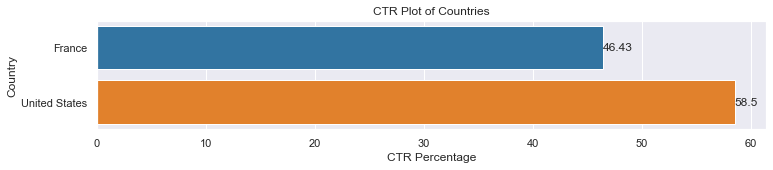

In [23]:
get_ctr()

##### **b.** Trend of the distinct count of visitors at an evnt_dt level.

In [16]:
# checking the count of dates we have at evnt_dt level
df["evnt_dt"].nunique()

1

As, we can see it will not be possible to find out the trend because we have data from only one single date in this case. We will need more information, especially data from over a particular period of time to study the trend of distinct count of visitors.

##### **c.** Function to get the click metrics according to browser type: (Event date is irrelevant in this function as we have data from only one single date.)

In [19]:
def get_click_metrics():
    import matplotlib.pyplot as plt
    import seaborn as sns # imported the required libraries 
    click_ser = df.groupby("browser_type")["Event"].value_counts() # grouped by distinct browser types and fetched the click and impression numbers
    sdf = click_ser.to_frame().rename({"Event":"Count"}, axis=1).reset_index() # we converted to df and reset the index of multilabel series to handle data more easily
    sdf = sdf[sdf["Event"] == "Click"] # filter df to show only click values
    click_pct = round(df.groupby("browser_type")["Event"].value_counts(normalize=True)*100,2) # grouped by distinct browser types and fetched the click and impression ratios
    cdf = click_pct.to_frame().rename({"Event":"pct"}, axis=1).reset_index() # we converted to df and reset the index of multilabel series to handle data more easily
    cdf = cdf[cdf["Event"] == "Click"].drop(columns="Event") # saved the percentage values in a df
    clm = pd.merge(left=sdf, right=cdf, on="browser_type", how="inner").sort_values(["Count"], ascending=False).rename({"browser_type":"Browser Type", "Count":"Total Click Count", "pct":"Click Ratio(in %)"}, axis=1) # merged the values and the percentage dfs for each browser types
    plt.figure(figsize=(12,4))
    ax = sns.barplot(data=clm[:5], x="Total Click Count", y="Browser Type", palette="tab20") # initialized a bar plot to display the top 5 browser types that gets the most clicks
    ax.bar_label(container=ax.containers[0], labels=clm["Total Click Count"][:5])
    plt.title("Top 5 browser types with most clicks")
    plt.xlabel("Number of clicks")
    plt.ylabel("Browser Name")
    plt.show() # showed the bar plot
    return clm # returned the click metrics dataframe

Lets test.

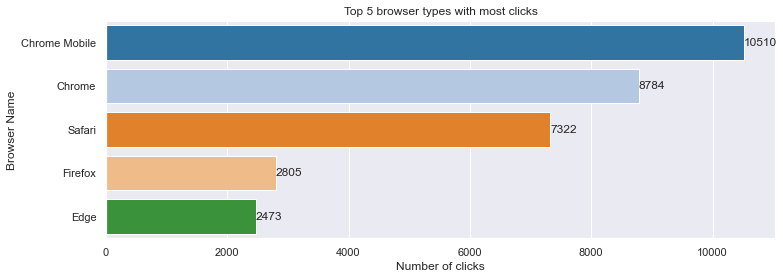

,Browser Type,Event,Total Click Count,Click Ratio(in %)
5,Chrome Mobile,Click,10510,35.53
4,Chrome,Click,8784,32.26
20,Safari,Click,7322,35.17
7,Firefox,Click,2805,24.70
6,Edge,Click,2473,43.02
21,Samsung Browser,Click,1410,38.49
9,Internet Explorer,Click,165,38.19
16,Opera Mobile,Click,111,41.57
11,MIUI Browser,Click,73,40.33
1,Amazon Silk,Click,27,47.37


In [20]:
get_click_metrics()

##### **7.** Latest Data Science Project I have worked on:

**Face Detection with Age and Gender Prediction web-app:** 

It is a very fun end-to-end project that I deployed recently where the app user can upload any image or use their device camera to click an image to upload. Once, the app gets an image, it scans the image and detects all the frontal faces in it and then predicts the age and gender of all detected faces and returns everything back to the user. In this project, for face detection, I used the Haar Cascade Classifier. The reason I went with this is because it is very simple and easy to implement while also being very reliable and accurate. This classifier is a machine learning based approach where a cascade function is trained from a lot of positive and negative images and then it is  used to detect objects in other images. We used the pre-trained model which is openly available in OpenCV library for our use case. 

For building our Age and Gender prediction model, I primarily used tensorflow and keras libraries. I used transfer learning from the pre-trained model "DenseNet121" to train our models. The reason I used "DenseNet121" is because it has relatively small size compared to other pre-trained models while also maintaining a very high accuracy on the ImageNet dataset. Also, it has a high number of parameters(8.1M) and depth(242) which is perfect for our use case. For our image dataset, we used the UTK Faces dataset from Kaggle. This dataset has around ~24,000 200x200 images of faces. We were only able to use 17000 of them with a smaller size of 100x100. The reason being that we were limited by resources and computation power. But still were were able to achieve an acceptable accuracy. We made 2 separate models to train age and gender. I used a very low learning rate while training to allow for stable global minima convergence and also to prevent overfitting. 

Then finally I used Streamlit to build the front-end of the app and deployed everything to cloud for anyone to use. 

Some of the challenges I faced while building this app was firstly, lots of crashes because I was constantly running out of memory on Google Colab so eventually I had to cut down a chunk of dataset and rescale the images to a lower resolution. This definitely had an effect to reduce our model accuracy as it lost a lot of features and images it could have learned on. Next, I had some difficulty in coming up with which pre-trained model I wanted to use as there were some very good options. But then I decided to go with DenseNet121 for the reasons mentioned above. Finally, I had to use limited epochs as we had limited computation power as provided by Google Colab.

App Link: https://share.streamlit.io/rishi5565/face-detection-with-age-and-gender-prediction/main/app.py

GitHub Link: https://github.com/rishi5565/face-detection-with-age-and-gender-prediction

##### **Thank you for reading!!**
##### **By: Rishiraj Chowdhury**
**Dated: 14-05-2022**